In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Editing

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_editing.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with Imagen 3 and modify existing images with mask-based editing and mask-free editing in the following modes:

- Inpainting
- Product background editing
- Outpainting
- Mask-free

## Get started


### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai.types import (
    EditImageConfig,
    GenerateImagesConfig,
    Image,
    MaskReferenceConfig,
    MaskReferenceImage,
    RawReferenceImage,
)

### Set Google Cloud project information and create client
To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define helper functions

In [6]:
import io
import urllib

from PIL import Image as PIL_Image
import matplotlib.pyplot as plt


# Gets the image bytes from a PIL Image object.
def get_bytes_from_pil(image: PIL_Image) -> bytes:
    # create in-memory binary stream io.BytesIO()
    byte_io_png = io.BytesIO()
    # save input 'image' to byte stream 'byte_io_png' using PNG format (common way to serialise img)
    image.save(byte_io_png, "PNG")
    # getvalue() retrieves 'sequence of bytes' from the stream
    return byte_io_png.getvalue()



# Pads an image for outpainting.
def pad_to_target_size(
    source_image,
    target_size=(1536, 1536),
    mode="RGB",
    # offset_ratio usu from -0.5 to 0.5
    # to offset 'inserted image' from the centre position (0)
    # to move img within padded canvas
    vertical_offset_ratio=0,
    horizontal_offset_ratio=0,
    # 255 for white in RGB -> fill padded area for 'masking'
    fill_val=255,
):
    orig_image_size_w, orig_image_size_h = source_image.size
    target_size_w, target_size_h = target_size

    # find insert_pt (x,y) coords to place ur source img
    #      in the centre of the target_size canvas
    # insert_pt_x = top-left corner 'x' coord
    # AND
    # offset_ratio adjusts the centre position - how????
    # eg horizontal_offset_ratio = 0.1, target_size_w/h = 1536
    #        adjustment = horizontal_offset_ratio * target_size_w
    #                   = 153.6 px TO THE RIGHT of 'target_centre_X'
    #    horizontal_offset_ratio = -0.1 to SHIFT LEFT
    insert_pt_x = (target_size_w - orig_image_size_w) // 2 + int(
        horizontal_offset_ratio * target_size_w
    )
    # y or h is calculated from 0 onwards, from bottom to top, or top to btm???? 
    #        TOP (0) TO BTM (ht)
    # insert_pt_y = top-left corner 'y' coord to place ur source img
    #               in the centre of the target_size canvas
    # AND
    # how is the offset calculated for ht????
    #        vertical_offset_ratio = POS or 0.1 -> increase insert_pt_y -> shift img down
    #                              = 0          -> no shift; still center the img
    #                              = NEG        -> decrease insert_pt_y -> shift img up
    insert_pt_y = (target_size_h - orig_image_size_h) // 2 + int(
        vertical_offset_ratio * target_size_h
    )
    
    
    # min - ensure img is not pased outside target boundaries - how????
    #       target_size_w - orig_image_size_w = max valid starting X coord (Left to Rt) for top-left corner of source_image
    #                                           if source_img left top-corner is @ this X-coord, source_img right edge will touch target canvas' right edge (target_size_w)
    insert_pt_x = min(insert_pt_x, target_size_w - orig_image_size_w)
    insert_pt_y = min(insert_pt_y, target_size_h - orig_image_size_h)

    
    if mode == "RGB":
        # create new/blank PIL_Image canvas
        source_image_padded = PIL_Image.new(
            mode, # RGB mode
            target_size, 
            color=(fill_val, fill_val, fill_val) # 1 fill_val value used across all R-G-B colour channels, to achieve the right RGB intensity
        )
    elif mode == "L":
        source_image_padded = PIL_Image.new(mode,  # L mode
                                            target_size, 
                                            color=(fill_val)) # 1 fill_val value (i.e. black to grey to white intensity)
    else:
        raise ValueError("source image mode must be RGB or L.")

    # PASTE source_image ONTO the new/BLANK source_image_padded canvas
    # the (insert_pt_x, insert_pt_y) coords need to be the 'centre' where the paste is situated????
    source_image_padded.paste(source_image, (insert_pt_x, insert_pt_y))
    return source_image_padded




# Pads and resizes image and mask to the same target size.
def pad_image_and_mask(
    image_vertex: PIL_Image,
    mask_vertex: PIL_Image,
    target_size,
    vertical_offset_ratio,
    horizontal_offset_ratio,
):
    # what is thumnail?
    #      method from pillow/PIL library to resize img
    #      thumbnail resizes img "in-place"
    # what does it do?
    #      set max dims - target_size
    #                     either 1 value (target_size) or a tuple (target_size_w, target_size_ht)
    # techincally thumbnail able to change aspect ratio? or need to use smth else?
    #      thumbnail ALWAYS PRESERVES ORIGINAL ASPECT RATIO
    #                determines ratio of orig size vs tgt size
    #                then apply min(orig_aspect_ratio, tgt_aspect_ratio) -> so orig_img fits inside tgt_size canvas
    #                eg orig img 2000x1000 -> aspect ratio 2:1
    #                   tgt_size 500x500   -> 1:1
    #                   scale down img by factor of 4 cuz 2000/500 = 4
    #                              img becomes (2000/4, 1000/4) = (500, 250) to keep the orig img aspect ratio 2:1
    #     thumbnail CANNOT CHANGE ASPECT RATIO
    #     to change aspect ratio, use
    #        .resize(tgt_size)
    image_vertex.thumbnail(target_size)
    mask_vertex.thumbnail(target_size)

    
    # reuse 'pad_to_target_size' defined above
    # resize orig img AND mask img
    image_vertex = pad_to_target_size(
        image_vertex,
        target_size=target_size,
        mode="RGB",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        
        # orig img - aft resizing, pad/fill with black cuz currently nothing in those pixel locations
        #            those locations are meant for model to fill in during outpainting (by white mask later)
        fill_val=0,
    )
    mask_vertex = pad_to_target_size(
        mask_vertex,
        target_size=target_size,
        mode="L",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        
        # mask img - aft resizing, pad/fill with 'white mask' for outpainting
        fill_val=255,
    )
    return image_vertex, mask_vertex




def display_images(original_image, modified_image) -> None:
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].imshow(original_image)
    axis[0].set_title("Original Image")
    
    axis[1].imshow(modified_image)
    axis[1].set_title("Edited Image")
    
    for ax in axis:
        ax.axis("off")
    plt.show()

### Load the image models

Imagen 3 Generation: `imagen-3.0-generate-002`

Imagen 3 Editing: `imagen-3.0-capability-001`

In [7]:
generation_model = "imagen-3.0-generate-002"

edit_model = "imagen-3.0-capability-001"

### Inpainting remove (edit_mode="EDIT_MODE_INPAINT_REMOVAL") AND mask_mode="MASK_MODE_SEMANTIC"

Inpainting remove allows you to use a mask area to remove image content.

In this next example, you'll take an image in Google Cloud Storage of a wall with a mirror and some photos and create a mask over detected mirror instances. You'll then remove this object by setting the edit mode to "EDIT_MODE_INPAINT_REMOVAL." For these types of requests the prompt can be an empty string.

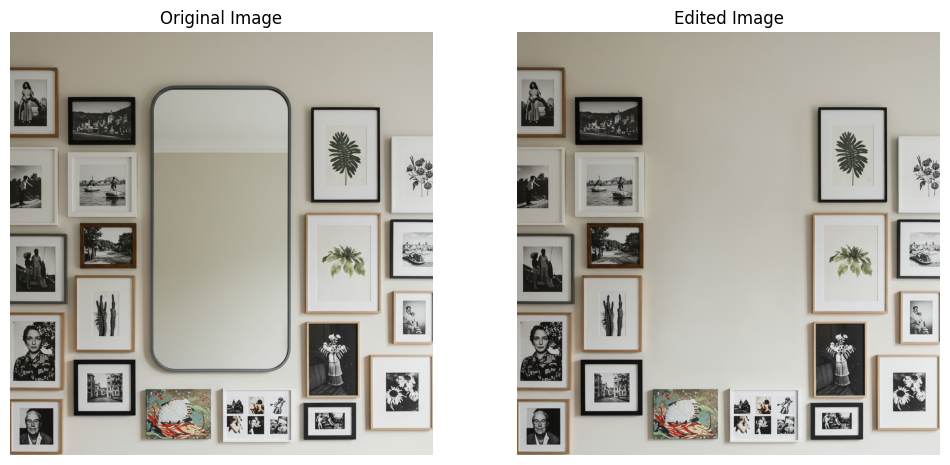

In [8]:
starting_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/mirror.png")
raw_ref_image = RawReferenceImage(reference_image=starting_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        # segmentation_classes => 85 REFERS TO mirror
        mask_mode="MASK_MODE_SEMANTIC", segmentation_classes=[85]
    ),
)

remove_image = client.models.edit_image(
    model=edit_model,
    prompt="",
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        # HERE, WE SPECIFY WE WANT TO REMOVAL THE MIRROR SEMANTIC CLASS (85) SEGMENTED
        edit_mode="EDIT_MODE_INPAINT_REMOVAL",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

starting_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/mirror.png"
    )
)

display_images(
    starting_image_show,
    remove_image.generated_images[0].image._pil_image,
)

### Product background editing via background swap mode (edit_mode="EDIT_MODE_BGSWAP")


You can also use Imagen 3 for product image editing. By setting `edit_mode` to "EDIT_MODE_BGSWAP", you can maintain the product content while modifying the image background.

For this example, start with an image stored in a Google Cloud Storage bucket, and provide a prompt describing the new background scene.  

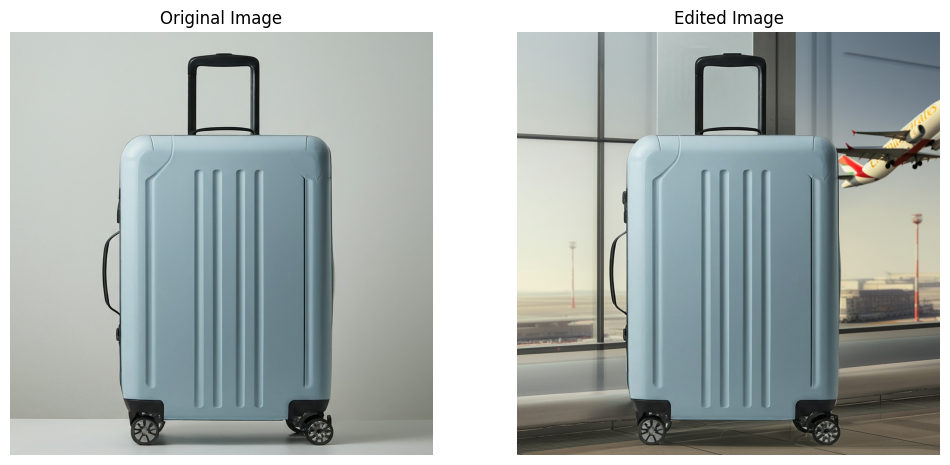

In [11]:
product_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/suitcase.png"
)

raw_ref_image = RawReferenceImage(reference_image=product_image, reference_id=0)

mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(mask_mode="MASK_MODE_BACKGROUND"),
)



# EDIT USING PROMPT TEXT, ON THE MASKED BACKGROUND
prompt = "a light blue suitcase in front of a window in DXB airport, lots of bright, natural lighting coming in from the windows, Emirates planes taking off in the distance"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_BGSWAP",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

product_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/suitcase.png"
    )
)
display_images(product_image_show, edited_image.generated_images[0].image._pil_image)

### Outpainting (edit_mode="EDIT_MODE_OUTPAINT") AND mask_mode="MASK_MODE_USER_PROVIDED"

Imagen 3 editing can be used for image outpainting. Outpainting is used to expand the content of an image to a larger area or area with different dimensions. To use the outpainting feature, you must create an image mask and prepare the original image by padding some empty space around it. Once you've padded the image, you can use the ```outpainting``` editing mode to fill in the empty space.

Copying gs://cloud-samples-data/generative-ai/image/living-room.png...
/ [1 files][  3.2 MiB/  3.2 MiB]                                                
Operation completed over 1 objects/3.2 MiB.                                      


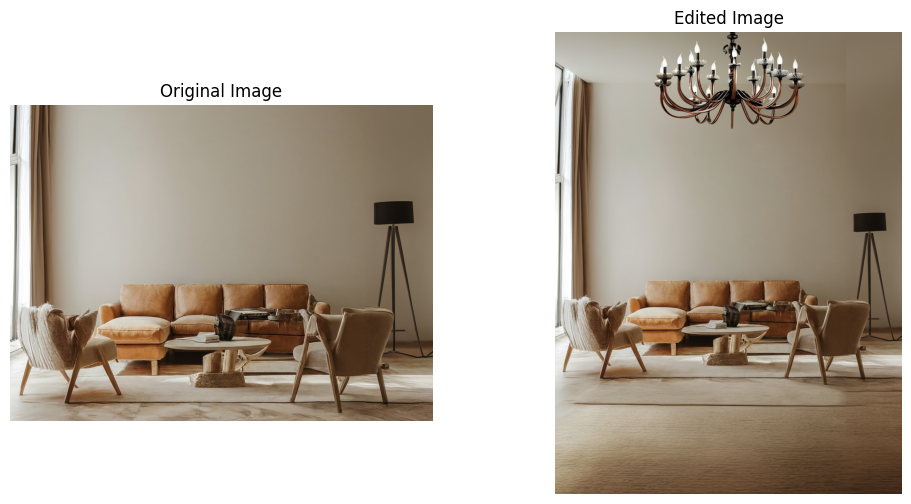

In [12]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/living-room.png" .
initial_image = Image.from_file(location="living-room.png")
mask = PIL_Image.new("L", initial_image._pil_image.size, 0)

target_size_w = int(2500 * eval("3/4"))
target_size = (target_size_w, 2500)
image_pil_outpaint, mask_pil_outpaint = pad_image_and_mask(
    initial_image._pil_image,
    mask,
    target_size,
    0,
    0,
)
image_pil_outpaint_image = Image(image_bytes=get_bytes_from_pil(image_pil_outpaint))
mask_pil_outpaint_image = Image(image_bytes=get_bytes_from_pil(mask_pil_outpaint))

raw_ref_image = RawReferenceImage(
    reference_image=image_pil_outpaint_image, reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=mask_pil_outpaint_image,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.03,
    ),
)

# OUTPAINT USING TEXT PROMPT
prompt = "a chandelier hanging from the ceiling"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_OUTPAINT",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

In [20]:
initial_image._pil_image.size

(1875, 1406)

In [21]:
# outpaint img - same width, larger height vs initial_image
image_pil_outpaint_image._pil_image.size

(1875, 2500)

In [22]:
mask_pil_outpaint_image._pil_image.size

(1875, 2500)

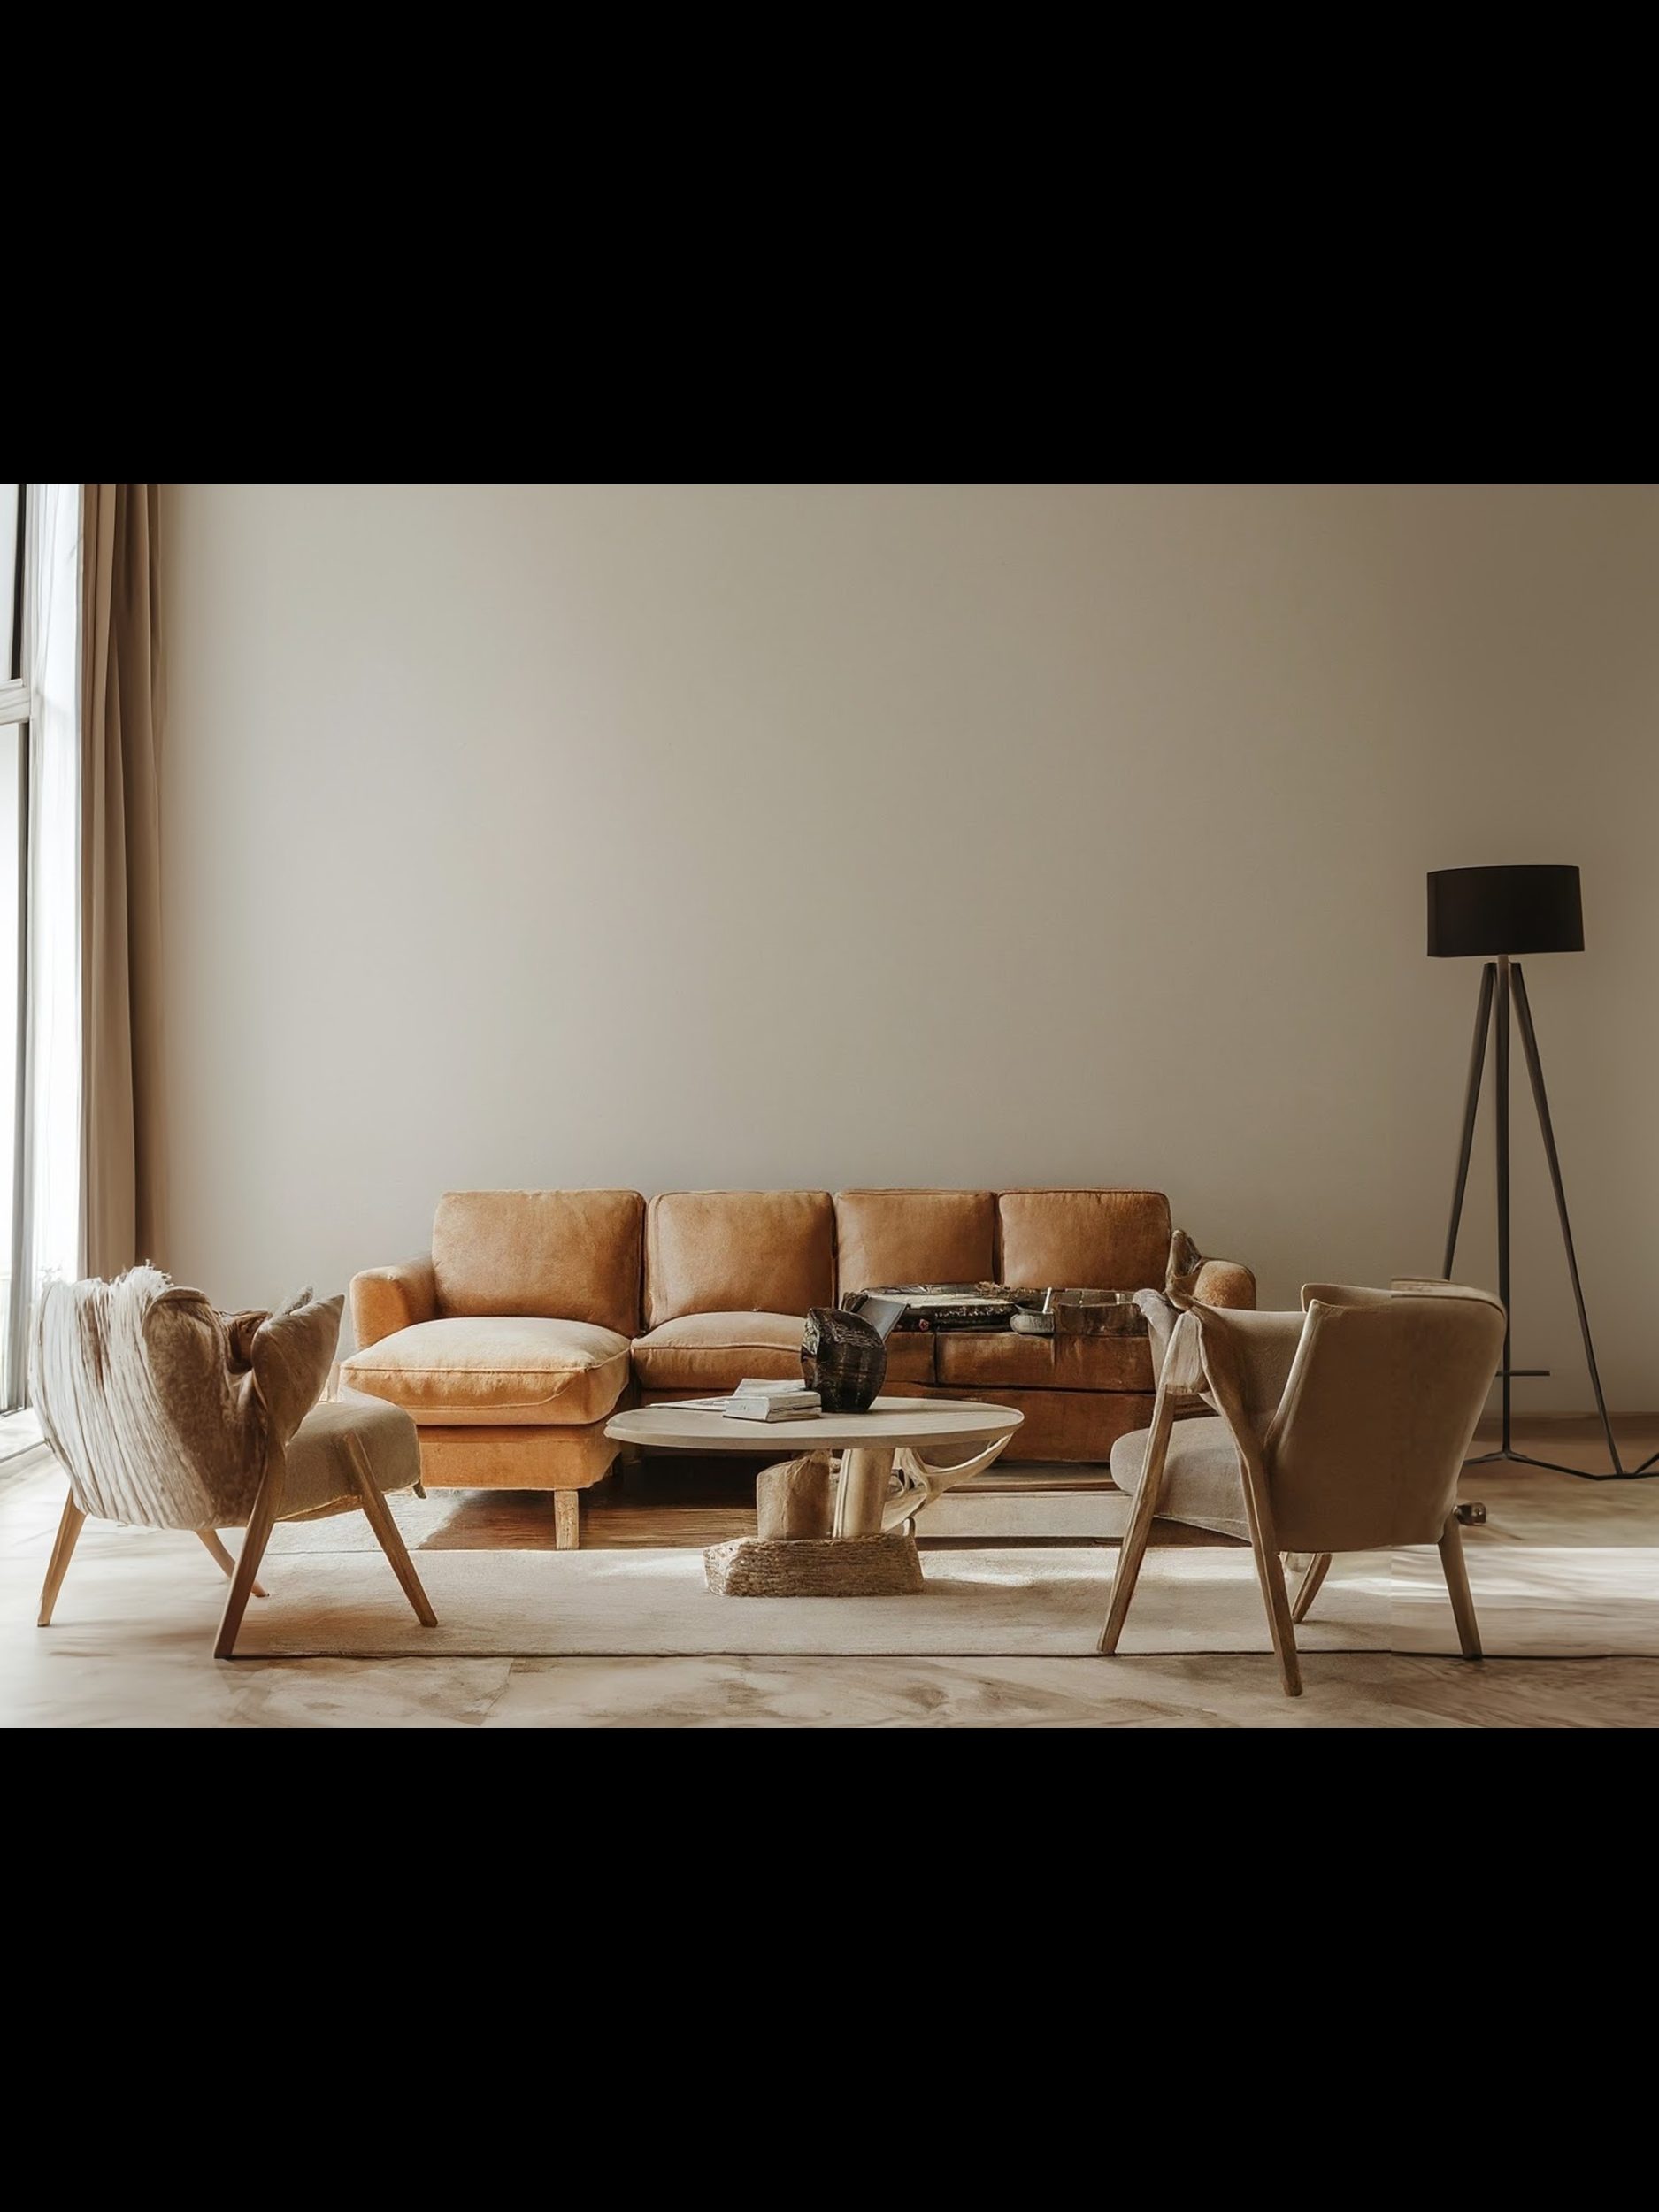

In [19]:
image_pil_outpaint_image._pil_image

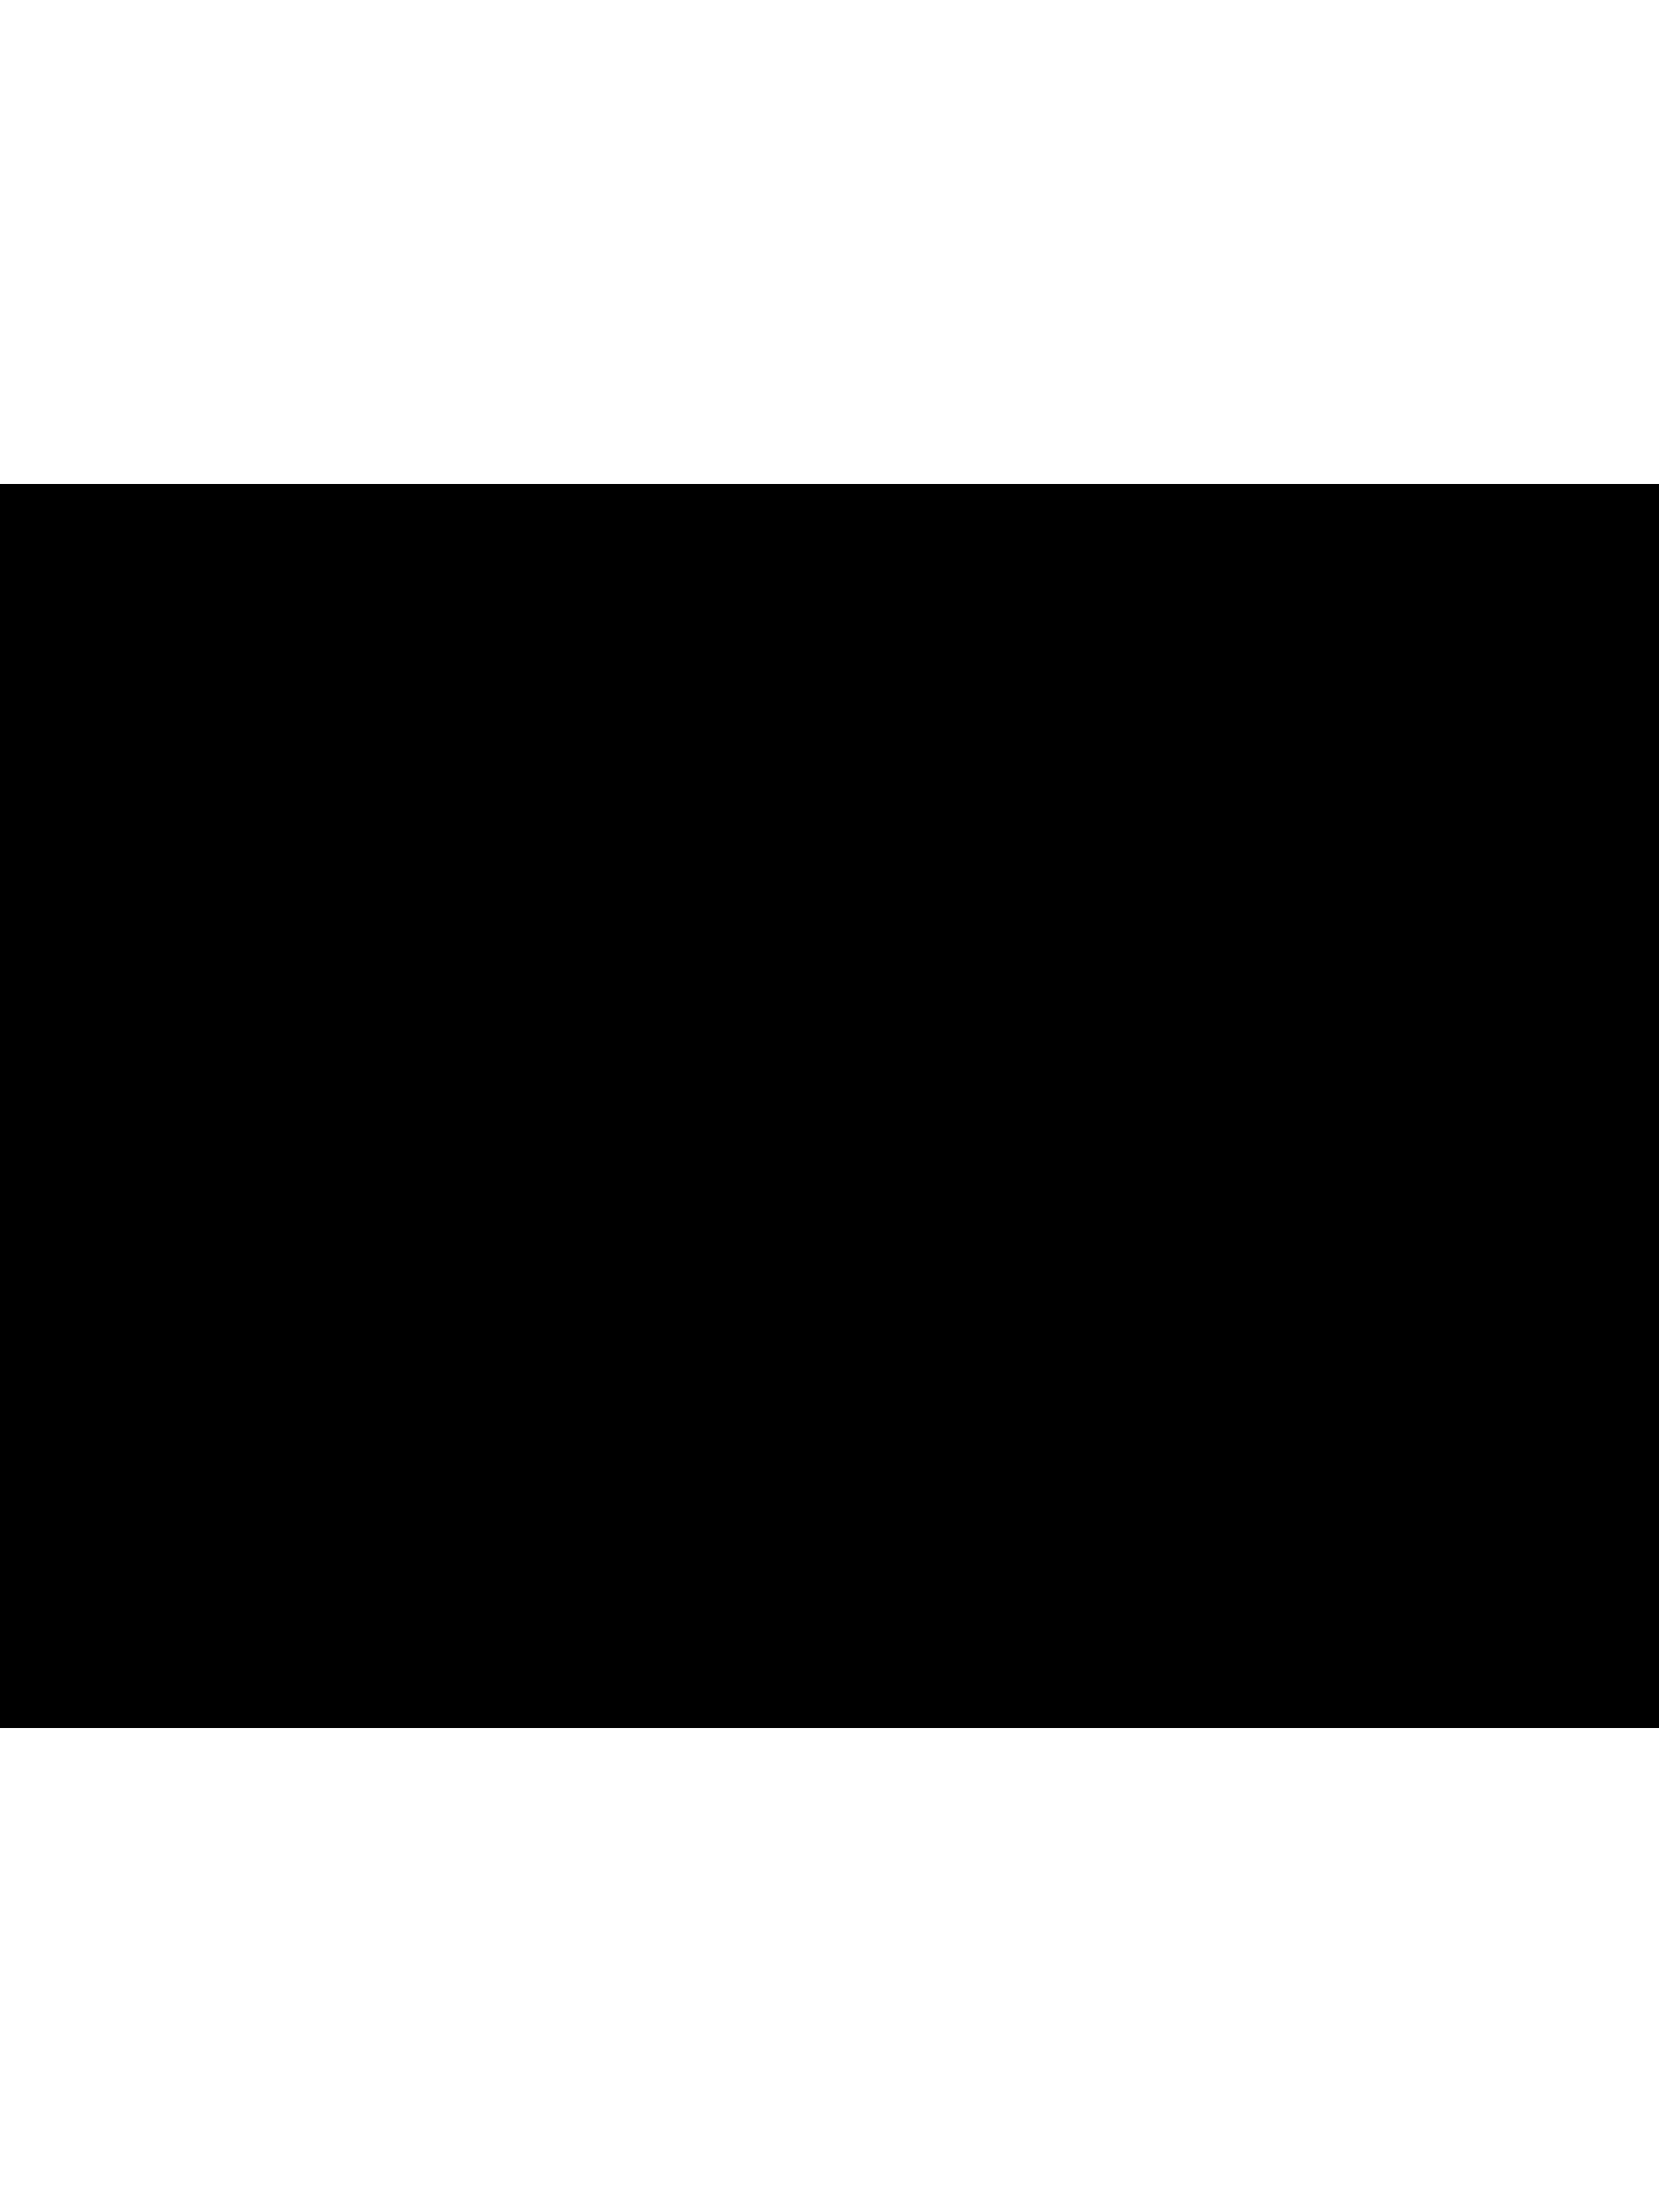

In [14]:
# the mask is for above and below the source_img
mask_pil_outpaint_image._pil_image

### Mask-free editing (edit_mode="EDIT_MODE_DEFAULT")

Imagen 3 editing also lets you edit images without a mask. Simply write the changes you wish to make to the image in the prompt and provide the original image as the sole reference image.

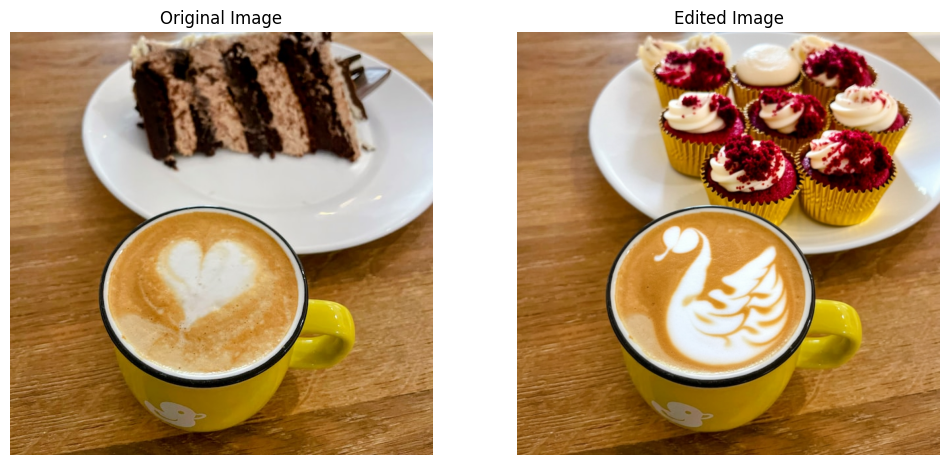

In [23]:
original_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/latte.jpg")
raw_ref_image = RawReferenceImage(reference_image=original_image, reference_id=0)


# edit using text prompt
prompt = "swan latte art in the coffee cup and an assortment of red velvet cupcakes in gold wrappers on the white plate"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

original_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/latte.jpg"
    )
)
display_images(original_image_show, edited_image.generated_images[0].image._pil_image)

### Semantic segmentation classes

| Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | backpack | 50 | carrot | 100 | sidewalk_pavement | 150 | skis |
| 1 | umbrella | 51 | hot_dog | 101 | runway | 151 | snowboard |
| 2 | bag | 52 | pizza | 102 | terrain | 152 | sports_ball |
| 3 | tie | 53 | donut | 103 | book | 153 | kite |
| 4 | suitcase | 54 | cake | 104 | box | 154 | baseball_bat |
| 5 | case | 55 | fruit_other | 105 | clock | 155 | baseball_glove |
| 6 | bird | 56 | food_other | 106 | vase | 156 | skateboard |
| 7 | cat | 57 | chair_other | 107 | scissors | 157 | surfboard |
| 8 | dog | 58 | armchair | 108 | plaything_other | 158 | tennis_racket |
| 9 | horse | 59 | swivel_chair | 109 | teddy_bear | 159 | net |
| 10 | sheep | 60 | stool | 110 | hair_dryer | 160 | base |
| 11 | cow | 61 | seat | 111 | toothbrush | 161 | sculpture |
| 12 | elephant | 62 | couch | 112 | painting | 162 | column |
| 13 | bear | 63 | trash_can | 113 | poster | 163 | fountain |
| 14 | zebra | 64 | potted_plant | 114 | bulletin_board | 164 | awning |
| 15 | giraffe | 65 | nightstand | 115 | bottle | 165 | apparel |
| 16 | animal_other | 66 | bed | 116 | cup | 166 | banner |
| 17 | microwave | 67 | table | 117 | wine_glass | 167 | flag |
| 18 | radiator | 68 | pool_table | 118 | knife | 168 | blanket |
| 19 | oven | 69 | barrel | 119 | fork | 169 | curtain_other |
| 20 | toaster | 70 | desk | 120 | spoon | 170 | shower_curtain |
| 21 | storage_tank | 71 | ottoman | 121 | bowl | 171 | pillow |
| 22 | conveyor_belt | 72 | wardrobe | 122 | tray | 172 | towel |
| 23 | sink | 73 | crib | 123 | range_hood | 173 | rug_floormat |
| 24 | refrigerator | 74 | basket | 124 | plate | 174 | vegetation |
| 25 | washer_dryer | 75 | chest_of_drawers | 125 | person | 175 | bicycle |
| 26 | fan | 76 | bookshelf | 126 | rider_other | 176 | car |
| 27 | dishwasher | 77 | counter_other | 127 | bicyclist | 177 | autorickshaw |
| 28 | toilet | 78 | bathroom_counter | 128 | motorcyclist | 178 | motorcycle |
| 29 | bathtub | 79 | kitchen_island | 129 | paper | 179 | airplane |
| 30 | shower | 80 | door | 130 | streetlight | 180 | bus |
| 31 | tunnel | 81 | light_other | 131 | road_barrier | 181 | train |
| 32 | bridge | 82 | lamp | 132 | mailbox | 182 | truck |
| 33 | pier_wharf | 83 | sconce | 133 | cctv_camera | 183 | trailer |
| 34 | tent | 84 | chandelier | 134 | junction_box | 184 | boat_ship |
| 35 | building | 85 | mirror | 135 | traffic_sign | 185 | slow_wheeled_object |
| 36 | ceiling | 86 | whiteboard | 136 | traffic_light | 186 | river_lake |
| 37 | laptop | 87 | shelf | 137 | fire_hydrant | 187 | sea |
| 38 | keyboard | 88 | stairs | 138 | parking_meter | 188 | water_other |
| 39 | mouse | 89 | escalator | 139 | bench | 189 | swimming_pool |
| 40 | remote | 90 | cabinet | 140 | bike_rack | 190 | waterfall |
| 41 | cell phone | 91 | fireplace | 141 | billboard | 191 | wall |
| 42 | television | 92 | stove | 142 | sky | 192 | window |
| 43 | floor | 93 | arcade_machine | 143 | pole | 193 | window_blind |
| 44 | stage | 94 | gravel | 144 | fence | | |
| 45 | banana | 95 | platform | 145 | railing_banister | | |
| 46 | apple | 96 | playingfield | 146 | guard_rail | | |
| 47 | sandwich | 97 | railroad | 147 | mountain_hill | | |
| 48 | orange | 98 | road | 148 | rock | | |
| 49 | broccoli | 99 | snow | 149 | frisbee | | |
